In [2]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import cv2
import numpy as np

Found 1988 images belonging to 6 classes.
Found 225 images belonging to 6 classes.
Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 227, 227, 3) 0                                            
__________________________________________________________________________________________________
conv2d_24 (Conv2D)              (None, 57, 57, 96)   34944       input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_24 (BatchNo (None, 57, 57, 96)   384         conv2d_24[0][0]                  
__________________________________________________________________________________________________
re_lu_24 (ReLU)                 (None, 57, 57, 96)   0           batch_normalization_24[0][0]     
____

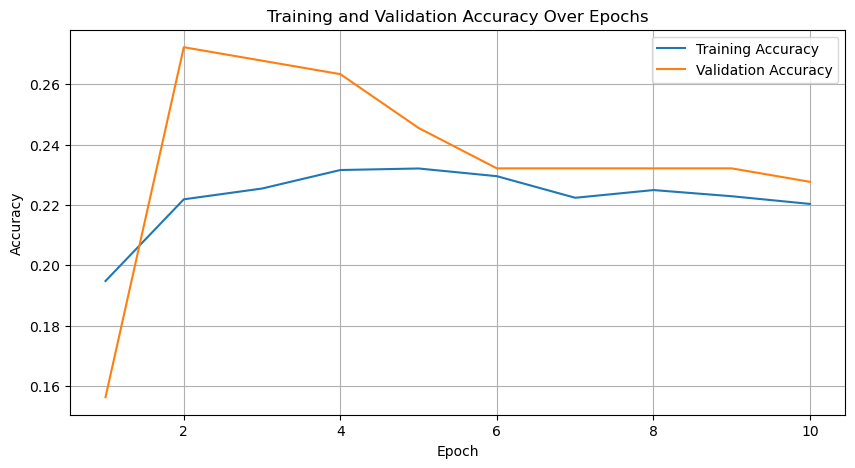

8/8 [==============================] - 2s 282ms/step - loss: 2.5247 - accuracy: 0.2311
Test accuracy: 0.23111110925674438


In [3]:
from keras_preprocessing.image import ImageDataGenerator
import os  
import cv2  
import numpy as np  
from sklearn.model_selection import train_test_split  
from tensorflow.keras import layers, models, optimizers, regularizers  
# 设置数据集路径  
data_dir = 'D:\CV_data'  
import tensorflow as tf  
from tensorflow.keras import layers, models  
import matplotlib.pyplot as plt  
  
# 设置数据集的路径  
train_dir = r'D:\cv_data2\s1'  
validation_dir = r'D:\cv_data2\t1'  
  
# 数据增强和预处理  
train_datagen = ImageDataGenerator(  
    rescale=1./255,  
    rotation_range=40,  
    width_shift_range=0.2,  
    height_shift_range=0.2,  
    shear_range=0.2,  
    zoom_range=0.2,  
    horizontal_flip=True,  
    fill_mode='nearest'  
)  
  
validation_datagen = ImageDataGenerator(rescale=1./255)  
  
train_generator = train_datagen.flow_from_directory(  
    train_dir,  
    target_size=(224, 224),  # AlexNet通常使用较大的输入尺寸，如224x224  
    batch_size=32,  
    class_mode='categorical'  
)  
  
validation_generator = validation_datagen.flow_from_directory(  
    validation_dir,  
    target_size=(224, 224),  
    batch_size=32,  
    class_mode='categorical'  
)  
  
# 构建AlexNet模型  
import tensorflow as tf  
from tensorflow.keras import layers, models, optimizers, regularizers  
  
def AlexNet(input_shape=(227, 227, 3), num_classes=1000):  
    inputs = layers.Input(shape=input_shape)  
      
    # 第一层卷积  
    x = layers.Conv2D(96, (11, 11), strides=(4, 4), padding='same',  
                      kernel_regularizer=regularizers.l2(1e-4))(inputs)  
    x = layers.BatchNormalization()(x)  
    x = layers.ReLU()(x)  
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)  
    x = layers.Dropout(0.25)(x)  
      
    # 第二层卷积  
    x = layers.Conv2D(256, (5, 5), strides=(1, 1), padding='same',  
                      kernel_regularizer=regularizers.l2(1e-4))(x)  
    x = layers.BatchNormalization()(x)  
    x = layers.ReLU()(x)  
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)  
    x = layers.Dropout(0.25)(x)  
      
    # 第三层卷积（两个并行路径）  
    branch1 = layers.Conv2D(384, (3, 3), strides=(1, 1), padding='same',  
                            kernel_regularizer=regularizers.l2(1e-4))(x)  
    branch1 = layers.BatchNormalization()(branch1)  
    branch1 = layers.ReLU()(branch1)  
      
    branch2 = layers.Conv2D(384, (3, 3), strides=(1, 1), padding='same',  
                            kernel_regularizer=regularizers.l2(1e-4))(x)  
    branch2 = layers.BatchNormalization()(branch2)  
    branch2 = layers.ReLU()(branch2)  
    branch2 = layers.Conv2D(384, (3, 3), strides=(1, 1), padding='same',  
                            kernel_regularizer=regularizers.l2(1e-4))(branch2)  
    branch2 = layers.BatchNormalization()(branch2)  
    branch2 = layers.ReLU()(branch2)  
      
    # 合并路径  
    merged = layers.concatenate([branch1, branch2])  
      
    # 第四层卷积  
    x = layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same',  
                      kernel_regularizer=regularizers.l2(1e-4))(merged)  
    x = layers.BatchNormalization()(x)  
    x = layers.ReLU()(x)  
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)  
    x = layers.Dropout(0.25)(x)  
      
    # 第五层（全连接层）  
    x = layers.Flatten()(x)  
    x = layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(1e-4))(x)  
    x = layers.Dropout(0.5)(x)  
    x = layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(1e-4))(x)  
    x = layers.Dropout(0.5)(x)  
    outputs = layers.Dense(num_classes, activation='softmax')(x)  
      
    # 创建模型  
    model = models.Model(inputs=inputs, outputs=outputs)  
      
    # 编译模型  
    model.compile(optimizer=optimizers.SGD(lr=0.001, momentum=0.9),  
                  loss='categorical_crossentropy',  
                  metrics=['accuracy'])  
      
    return model  
  
# 使用示例  
input_shape = (227, 227, 3)  
num_classes = 1000  
model = AlexNet(input_shape, num_classes)  
model.summary()
input_shape = (227, 227, 3)  # AlexNet的输入尺寸  
num_classes = train_generator.num_classes  # 从数据生成器中获取类别数  
model = AlexNet(input_shape, num_classes)  
  
# 编译和训练模型  
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  
history = model.fit(  
    train_generator,  
    steps_per_epoch=train_generator.samples // train_generator.batch_size,  
    epochs=10,  
    validation_data=validation_generator,  
    validation_steps=validation_generator.samples // validation_generator.batch_size  
)  
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
 
# 绘制准确度变化图
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(validation_accuracy) + 1), validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()
# 评估模型  
test_loss, test_acc = model.evaluate(validation_generator)  
print(f'Test accuracy: {test_acc}') 